### Mutant Moneyball Data at a Glance

This dataset is definitely untidy, as there are multiple columns for variables like value, the market (ebay, wiz, street, etc.), or the decade (60s-90s)

Before tidying the data, I would like to do some formatting and preliminary analysis of the data, like getting rid of dollar signs, making sure there aren't missing values, and making sure all of my data follow the same format

In [2]:
import pandas as pd

# load the data
df = pd.read_csv('mutant_moneyball.csv')

# display the df
df.head()

,Member,TotalValue60s_heritage,TotalValue70s_heritage,TotalValue80s_heritage,TotalValue90s_heritage,TotalValue60s_ebay,TotalValue70s_ebay,TotalValue80s_ebay,TotalValue90s_ebay,TotalValue60s_wiz,TotalValue70s_wiz,TotalValue80s_wiz,TotalValue90s_wiz,TotalValue60s_oStreet,TotalValue70s_oStreet,TotalValue80s_oStreet,TotalValue90s_oStreet
0,warrenWorthington,929056.0,154585.0,23957.0,960.0,23335.0,3362.0,583.0,97.0,"$7,913.00","$1,105.00",$226.00,$65.75,"$68,160.00","$7,360.00",$975.00,$123.00
1,hankMcCoy,929776.0,20705.0,6631.0,881.0,23377.0,1224.0,289.0,82.0,"$7,953.00",$851.00,$89.00,$38.50,"$68,390.00","$5,260.00",$431.00,$81.00
2,scottSummers,933616.0,188635.0,29240.0,739.0,23420.0,5431.0,1031.0,82.0,"$7,993.00","$1,979.00",$438.00,$39.25,"$68,590.00","$11,675.00","$1,427.00",$74.00
3,bobbyDrake,929776.0,154585.0,1514.0,874.0,23377.0,3362.0,70.0,93.0,"$7,953.00","$1,105.00",$48.00,$62.00,"$68,390.00","$7,360.00",$137.00,$108.00
4,jeanGrey,933616.0,179899.0,16868.0,1708.0,23420.0,4903.0,665.0,170.0,"$7,993.00","$1,679.00",$165.00,$108.00,"$68,590.00","$10,265.00",$822.00,$189.00


In [3]:
# Print our column names
# Check for missing values
print(df.columns)
print('\n', df.isna().sum())

Index(['Member', 'TotalValue60s_heritage', 'TotalValue70s_heritage',
       'TotalValue80s_heritage', 'TotalValue90s_heritage',
       'TotalValue60s_ebay', 'TotalValue70s_ebay', 'TotalValue80s_ebay',
       'TotalValue90s_ebay', 'TotalValue60s_wiz', 'TotalValue70s_wiz',
       'TotalValue80s_wiz', 'TotalValue90s_wiz', 'TotalValue60s_oStreet',
       'TotalValue70s_oStreet', 'TotalValue80s_oStreet',
       'TotalValue90s_oStreet'],
      dtype='object')

 Member                     0
TotalValue60s_heritage    16
TotalValue70s_heritage    10
TotalValue80s_heritage     3
TotalValue90s_heritage     4
TotalValue60s_ebay        16
TotalValue70s_ebay        10
TotalValue80s_ebay         3
TotalValue90s_ebay         4
TotalValue60s_wiz         16
TotalValue70s_wiz         10
TotalValue80s_wiz          3
TotalValue90s_wiz          4
TotalValue60s_oStreet     16
TotalValue70s_oStreet     10
TotalValue80s_oStreet      3
TotalValue90s_oStreet      4
dtype: int64


In [4]:
# If there's missing values, replace with zeros.
df = df.fillna(0)
print('\n', df.isna().sum())

# Because I'm dealing with monetary values,
# I want my observations (except for Member) to be floats and not objects.
# This will also make data visualization and analysis easier
df.dtypes

# Get rid of dollar signs

cols = [
    'TotalValue60s_wiz', 'TotalValue70s_wiz', 'TotalValue80s_wiz', 'TotalValue90s_wiz',
    'TotalValue60s_oStreet', 'TotalValue70s_oStreet', 'TotalValue80s_oStreet', 'TotalValue90s_oStreet'
]

# Clean up strings with unwanted information
for col in cols:
    df[col] = df[col].astype(str).str.replace(r'[\$,]', '', regex=True).str.strip().astype(float)

# Optional sanity check: Look at the new csv file to verify no abnormalities
#df.to_csv('test.csv', index=False)


 Member                    0
TotalValue60s_heritage    0
TotalValue70s_heritage    0
TotalValue80s_heritage    0
TotalValue90s_heritage    0
TotalValue60s_ebay        0
TotalValue70s_ebay        0
TotalValue80s_ebay        0
TotalValue90s_ebay        0
TotalValue60s_wiz         0
TotalValue70s_wiz         0
TotalValue80s_wiz         0
TotalValue90s_wiz         0
TotalValue60s_oStreet     0
TotalValue70s_oStreet     0
TotalValue80s_oStreet     0
TotalValue90s_oStreet     0
dtype: int64


In [5]:
df.head()

,Member,TotalValue60s_heritage,TotalValue70s_heritage,TotalValue80s_heritage,TotalValue90s_heritage,TotalValue60s_ebay,TotalValue70s_ebay,TotalValue80s_ebay,TotalValue90s_ebay,TotalValue60s_wiz,TotalValue70s_wiz,TotalValue80s_wiz,TotalValue90s_wiz,TotalValue60s_oStreet,TotalValue70s_oStreet,TotalValue80s_oStreet,TotalValue90s_oStreet
0,warrenWorthington,929056.0,154585.0,23957.0,960.0,23335.0,3362.0,583.0,97.0,7913.0,1105.0,226.0,65.75,68160.0,7360.0,975.0,123.0
1,hankMcCoy,929776.0,20705.0,6631.0,881.0,23377.0,1224.0,289.0,82.0,7953.0,851.0,89.0,38.50,68390.0,5260.0,431.0,81.0
2,scottSummers,933616.0,188635.0,29240.0,739.0,23420.0,5431.0,1031.0,82.0,7993.0,1979.0,438.0,39.25,68590.0,11675.0,1427.0,74.0
3,bobbyDrake,929776.0,154585.0,1514.0,874.0,23377.0,3362.0,70.0,93.0,7953.0,1105.0,48.0,62.00,68390.0,7360.0,137.0,108.0
4,jeanGrey,933616.0,179899.0,16868.0,1708.0,23420.0,4903.0,665.0,170.0,7993.0,1679.0,165.0,108.00,68590.0,10265.0,822.0,189.0


### Data Cleaning & Tidy Process

- `pd.melt(df)` can be used to gather columns into rows.
This will be one of our primary tools to tidy our data by turning our data from a wide to long format

- **(Optional) Method Chaining**: By method chaining, we can apply multiple methods to our df at once, this often improves readability of our code. 

# Tidying the Data:
- Because of the data's "wide" format, there are multiple variables stored within the columns of our dataframe
    - For example, TotalValue60s_heritage is 3 variables: Total Value, the time period, and the market in which this value is associated. 
- By melting our dataframe, we can effectively separate these variables into their respective columns, so that we have a column for Total Value, Decade, and Market
- In the long run, this will make the data much cleaner and easier to interpret.
    - Note that this entails repeated Mutant names, since each mutant will need multiple observations depending on the time period or market. 

- Later, I will also show how we could pivot the data back into a wider format. While this isn't strictly tidy, sometimes a wide format is more readable. 

In [6]:
# Option 1: without method chaining
# Melt the DataFrame to long format
df_melted = df.melt(id_vars=['Member'], var_name='Decade_Market', value_name='TotalValue')

# Split 'Decade_Market' into 'Decade' and 'Market' using str.extract
# I find that str.extract, while harder to read, is more precise 
df_melted[['Decade', 'Market']] = df_melted['Decade_Market'].str.extract(r'TotalValue(?P<Decade>\d{2}s)_(?P<Market>\w+)')

# Nonetheless, one could also use str.split() and str.replace(), per the instructions on Canvas
# df_melted[['Decade', 'Market']] = df_melted['Decade_Market'].str.replace('TotalValue', '', regex=False).str.split('_', expand=True)

# Drop the original 'Decade_Market' column
df_melted = df_melted.drop(columns=['Decade_Market'])

# Optional: sort by members instead of our new variables
df_melted = df_melted.sort_values(by=['Member', 'Decade', 'Market'], ascending=[True, True, True]).reset_index(drop=True)

print(df_melted.head(20))
print('\n', df_melted.tail())


          Member  TotalValue Decade    Market
0    alexSummers       745.0    60s      ebay
1    alexSummers     34519.0    60s  heritage
2    alexSummers      1850.0    60s   oStreet
3    alexSummers       342.0    60s       wiz
4    alexSummers      2703.0    70s      ebay
5    alexSummers    144946.0    70s  heritage
6    alexSummers      3865.0    70s   oStreet
7    alexSummers       597.0    70s       wiz
8    alexSummers       581.0    80s      ebay
9    alexSummers      9352.0    80s  heritage
10   alexSummers       502.0    80s   oStreet
11   alexSummers       253.0    80s       wiz
12   alexSummers        21.0    90s      ebay
13   alexSummers       197.0    90s  heritage
14   alexSummers        24.0    90s   oStreet
15   alexSummers        19.0    90s       wiz
16  alisonBlaire         0.0    60s      ebay
17  alisonBlaire         0.0    60s  heritage
18  alisonBlaire         0.0    60s   oStreet
19  alisonBlaire         0.0    60s       wiz

                 Member  TotalVal

In [7]:
# Option 2: produces the same df by with method chaining

# Note that the extract syntax can be somewhat convoluted
# 'TotalValue': Matches the literal string "TotalValue".
# (?P<Decade>\d{2}s): for the Named group "Decade" that matches two digits (\d{2}) followed by the letter 's' (e.g., "60s", "70s").
# '_': Matches the underscore separating the Decade and Market.
# (?P<Market>\w+): Named group "Market" that matches one or more word characters (letters, digits, or underscores).
df_melted2 = (
    pd.melt(df, id_vars=['Member'],
            var_name='Decade_Market',
            value_name='TotalValue')
    .assign(**df.melt(id_vars=['Member'], 
                      var_name='Decade_Market', 
                      value_name='TotalValue')['Decade_Market']
             .str.extract(r'TotalValue(?P<Decade>\d{2}s)_(?P<Market>\w+)'))
    .drop(columns=['Decade_Market'])
    .sort_values(by=['Member', 'Decade', 'Market'], ascending=[True, True, True]).reset_index(drop=True)
)

df_melted2

,Member,TotalValue,Decade,Market
0,alexSummers,745.00,60s,ebay
1,alexSummers,34519.00,60s,heritage
2,alexSummers,1850.00,60s,oStreet
3,alexSummers,342.00,60s,wiz
4,alexSummers,2703.00,70s,ebay
...,...,...,...,...
411,warrenWorthington,226.00,80s,wiz
412,warrenWorthington,97.00,90s,ebay
413,warrenWorthington,960.00,90s,heritage
414,warrenWorthington,123.00,90s,oStreet


### Visualizations

- Below I use matplotlib and seaborn to create some basic barcharts and plots. I mostly focused on grouping the observations either by decade or market, and showing some of the differences in values.
- Note that some difficulties arise because of how many zeros are in this dataset, as well as the large discrepancies between the values between the different members. 

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import squarify


mutants2 = ['charlesXavier', 'jeanGrey', 'bobbyDrake', 'scottSummers',
           'hankMcCoy', 'alexSummers', 'lornaDane', 'seanCassidy', 'ericMagnus', 'peterRasputin']
df_trunc2 = df_melted[df_melted['Member'].isin(mutants2)].reset_index(drop=True)

# I decided to start by looking at these 4 mutants. I like them and they didn't have any zeros in their columns. 
mutants = ['charlesXavier', 'jeanGrey', 'bobbyDrake', 'scottSummers']
df_trunc = df_melted[df_melted['Member'].isin(mutants)].reset_index(drop=True)

print(df_trunc.head(20))


           Member  TotalValue Decade    Market
0      bobbyDrake     23377.0    60s      ebay
1      bobbyDrake    929776.0    60s  heritage
2      bobbyDrake     68390.0    60s   oStreet
3      bobbyDrake      7953.0    60s       wiz
4      bobbyDrake      3362.0    70s      ebay
5      bobbyDrake    154585.0    70s  heritage
6      bobbyDrake      7360.0    70s   oStreet
7      bobbyDrake      1105.0    70s       wiz
8      bobbyDrake        70.0    80s      ebay
9      bobbyDrake      1514.0    80s  heritage
10     bobbyDrake       137.0    80s   oStreet
11     bobbyDrake        48.0    80s       wiz
12     bobbyDrake        93.0    90s      ebay
13     bobbyDrake       874.0    90s  heritage
14     bobbyDrake       108.0    90s   oStreet
15     bobbyDrake        62.0    90s       wiz
16  charlesXavier     21224.0    60s      ebay
17  charlesXavier    819537.0    60s  heritage
18  charlesXavier     63095.0    60s   oStreet
19  charlesXavier      7000.0    60s       wiz


**Figure 1: Tree map of Total Value for different mutants**

- I picked 10 mutants that I liked and that didn't have (too many) zeros in any of the columns and I show their value throughout the decades.
- The big takeaways are:
    - The comics from the 60s are valued the most, which also makes sense because they are probably rarer and they're antiques
    - Some mutants, like Charles Xavier, are consistently relatively very popular for their decade. Others, like Alexsummers vary a lot in their relative popularity.
        - Assuming value is a proxy for popularity. 
- I struggled a bit with the formatting of this graph, as some of the smaller squares get messy

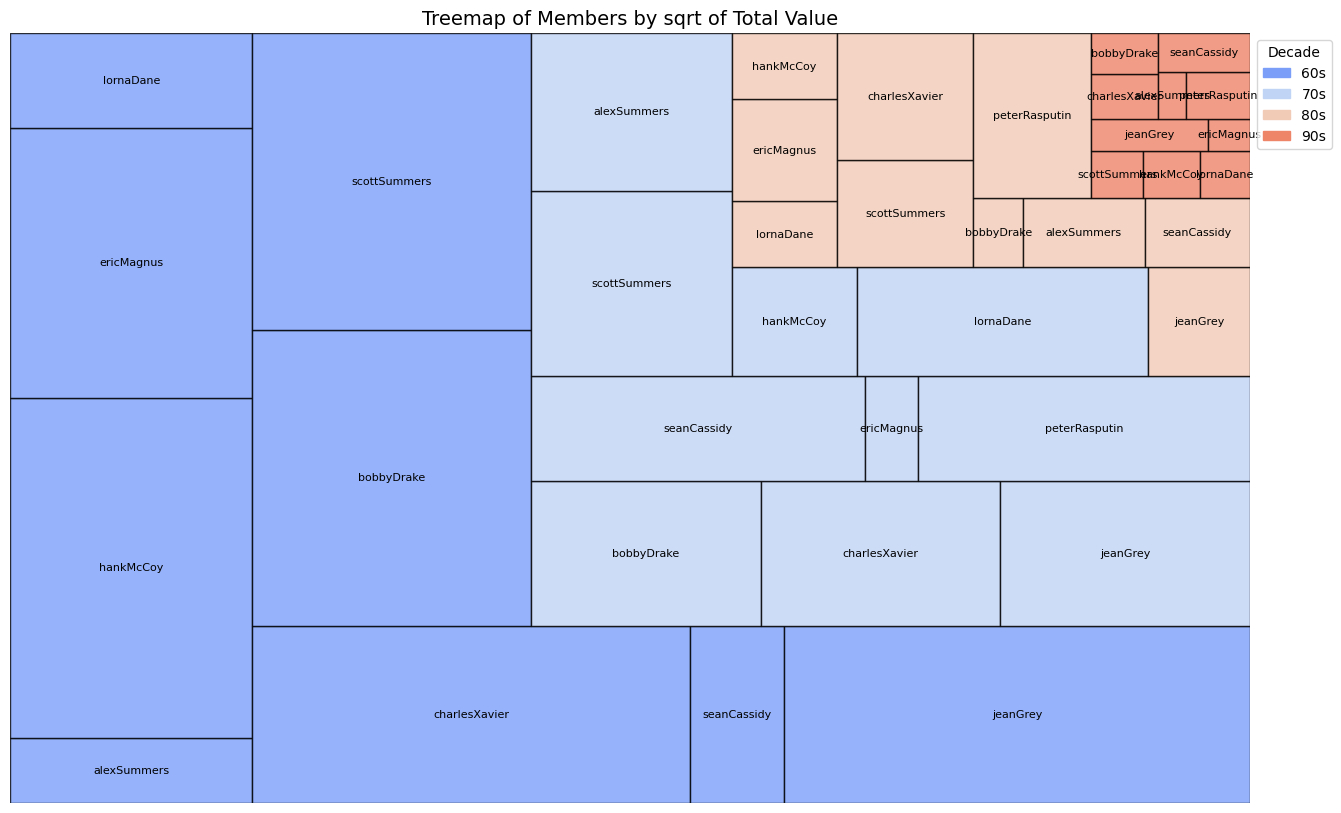

In [ ]:
import numpy as np

df_grouped = df_trunc2.groupby(["Member", "Decade"], as_index=False)["TotalValue"].sum()

# Define a color palette for decades; other predefined palettes are "Blues" or "Set1". 
# you can also look up custom palettes
unique_decades = df_grouped['Decade'].unique()
color_palette = sns.color_palette("coolwarm", len(unique_decades))
decade_color_map = dict(zip(unique_decades, color_palette)) #zip combines iterables element wise into tuples

# Map colors to the dataframe
df_grouped["Color"] = df_grouped["Decade"].map(decade_color_map) # map applies a fxn to items in an iterable

# Remove rows where TotalValue is 0
df_grouped = df_grouped[df_grouped["TotalValue"] > 0] # Otherwise there will be an error,
df_grouped["ScaledValue"] = np.sqrt(df_grouped["TotalValue"])
# df_grouped["ScaledValue"] = np.log1p(df_grouped["TotalValue"])


df_grouped = df_grouped.sort_values(by="Decade")

# Use ScaledValue instead of TotalValue in the treemap
plt.figure(figsize=(16, 10))
squarify.plot(
    sizes=df_grouped["ScaledValue"], 
    label=df_grouped["Member"], 
    color=df_grouped["Color"], 
    alpha=0.8,
    text_kwargs={'fontsize': 8},
    edgecolor="black"
)

plt.axis('off')
plt.title('Treemap of Members by sqrt of Total Value', fontsize=14)

# This adds a legend and specifies that it's outside of the range of the image
handles = [plt.Rectangle((0, 0), 1, 1, color=decade_color_map[d]) for d in unique_decades]
plt.legend(handles, unique_decades, title="Decade", loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

**Figure 2: Sankey Chart of Value for Charles Xavier (Fail)**

- I think I messed this one up. I wanted to show a flow chart of Charles Xavier's value over time. 
    - Even when using multiple mutants, the flow chart doesn't look quite right. I also am not sure why the 90s don't show up. 
- Feel free to visit to mess around with it some more:
    - https://plotly.com/python/sankey-diagram/
- Nonetheless, it's interesting to see the breakdown of value for Charles Xavier and I think there's a lot of potential for the Sankey Charts. 


In [ ]:
import plotly.graph_objects as go

# Filter data for Charles Xavier
mutant = 'charlesXavier'
df_mutant = df_trunc[df_trunc['Member'] == mutant]

# List of decades and markets (assuming these are in your dataframe)
decades = ['60s', '70s', '80s', '90s']
markets = df_mutant['Market'].unique()  # Get unique markets from the df_mutant

# Create a dictionary for mapping decades and markets to integer indices
decade_map = {decade: i for i, decade in enumerate(decades)}
market_map = {market: len(decades) + i for i, market in enumerate(markets)}  # Mapping markets after decades

# Create the source, target, and value lists for the Sankey diagram
sources = []
targets = []
values = []

# Loop over each decade and market to get flows
for i in range(len(decades) - 1):  # Loop over decade transitions (60s to 70s, 70s to 80s, 80s to 90s)
    for market in markets:
        # Get the value for the current decade and market
        value_current_decade = df_mutant[(df_mutant['Decade'] == decades[i]) & (df_mutant['Market'] == market)]['TotalValue'].sum()
        value_next_decade = df_mutant[(df_mutant['Decade'] == decades[i + 1]) & (df_mutant['Market'] == market)]['TotalValue'].sum()
        
        # Create the flow regardless of value (since no zero values exist)
        sources.append(decade_map[decades[i]])  # Source: current decade
        targets.append(market_map[market])     # Target: market
        values.append(value_current_decade)  # Flow value (can use value_next_decade if you prefer)

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=decades + list(markets),  # Combine decades and markets in the labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
    )
))

fig.update_layout(
    title_text="Flow of Total Value from Decades into different Markets (Charles Xavier)",
    font_size=10,
)

fig.show()


**Figure 3: Value over time and by market for 4 different mutants**

- I picked 4 mutants that I liked and that didn't have zeros in any of the columns and I show their value throughout the decades and across the different markets.
- The big takeaways are:
    - the heritage market seems to value the comics the most, which makes sense because they are a renowned auction company
    - The comics from the 60s are valued the most, which also makes sense because they are probably rarer and they're antiques
    - These mutants seem to have similar values, assuming the market and decade variables are the same. 

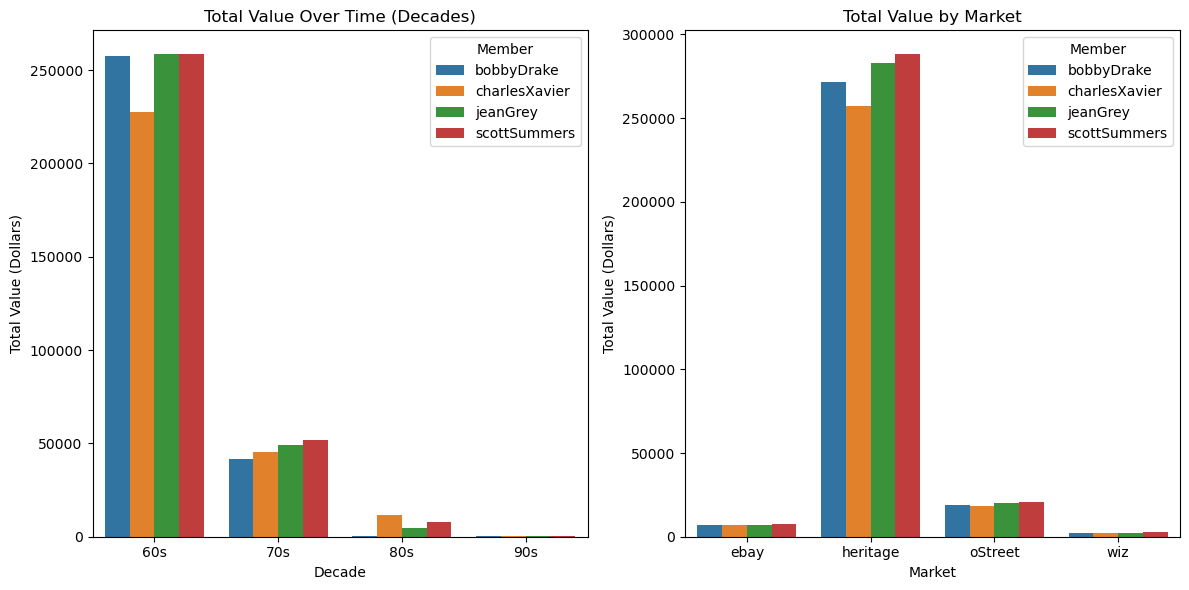

In [17]:
plt.figure(figsize=(12, 6))

# Create a bar plot for TotalValue over Decade for each member
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.barplot(x='Decade', y='TotalValue', hue='Member', data=df_trunc, errorbar=None)
plt.title('Total Value Over Time (Decades)')
plt.xlabel('Decade')
plt.ylabel('Total Value (Dollars)')

# Create a bar plot for TotalValue by Market for each member
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.barplot(x='Market', y='TotalValue', hue='Member', data=df_trunc, errorbar=None)
plt.title('Total Value by Market')
plt.xlabel('Market')
plt.ylabel('Total Value (Dollars)')

plt.tight_layout()
plt.show()

**Figure 4: Total Value by Mutant**

- Here I show a barplot of the total value, in ascending order, of each Mutant in this dataset. 
- This visual could be useful to show which mutants are the most popular. For example, I would say the mutants from Logan Howlett and on are the more well-known X-Men, generally speaking. 
- This visual also gives an idea of how many mutants don't have a high total value; I'm not sure if this is because there is missing data or if these mutants don't have many lucrative comics to their name. 

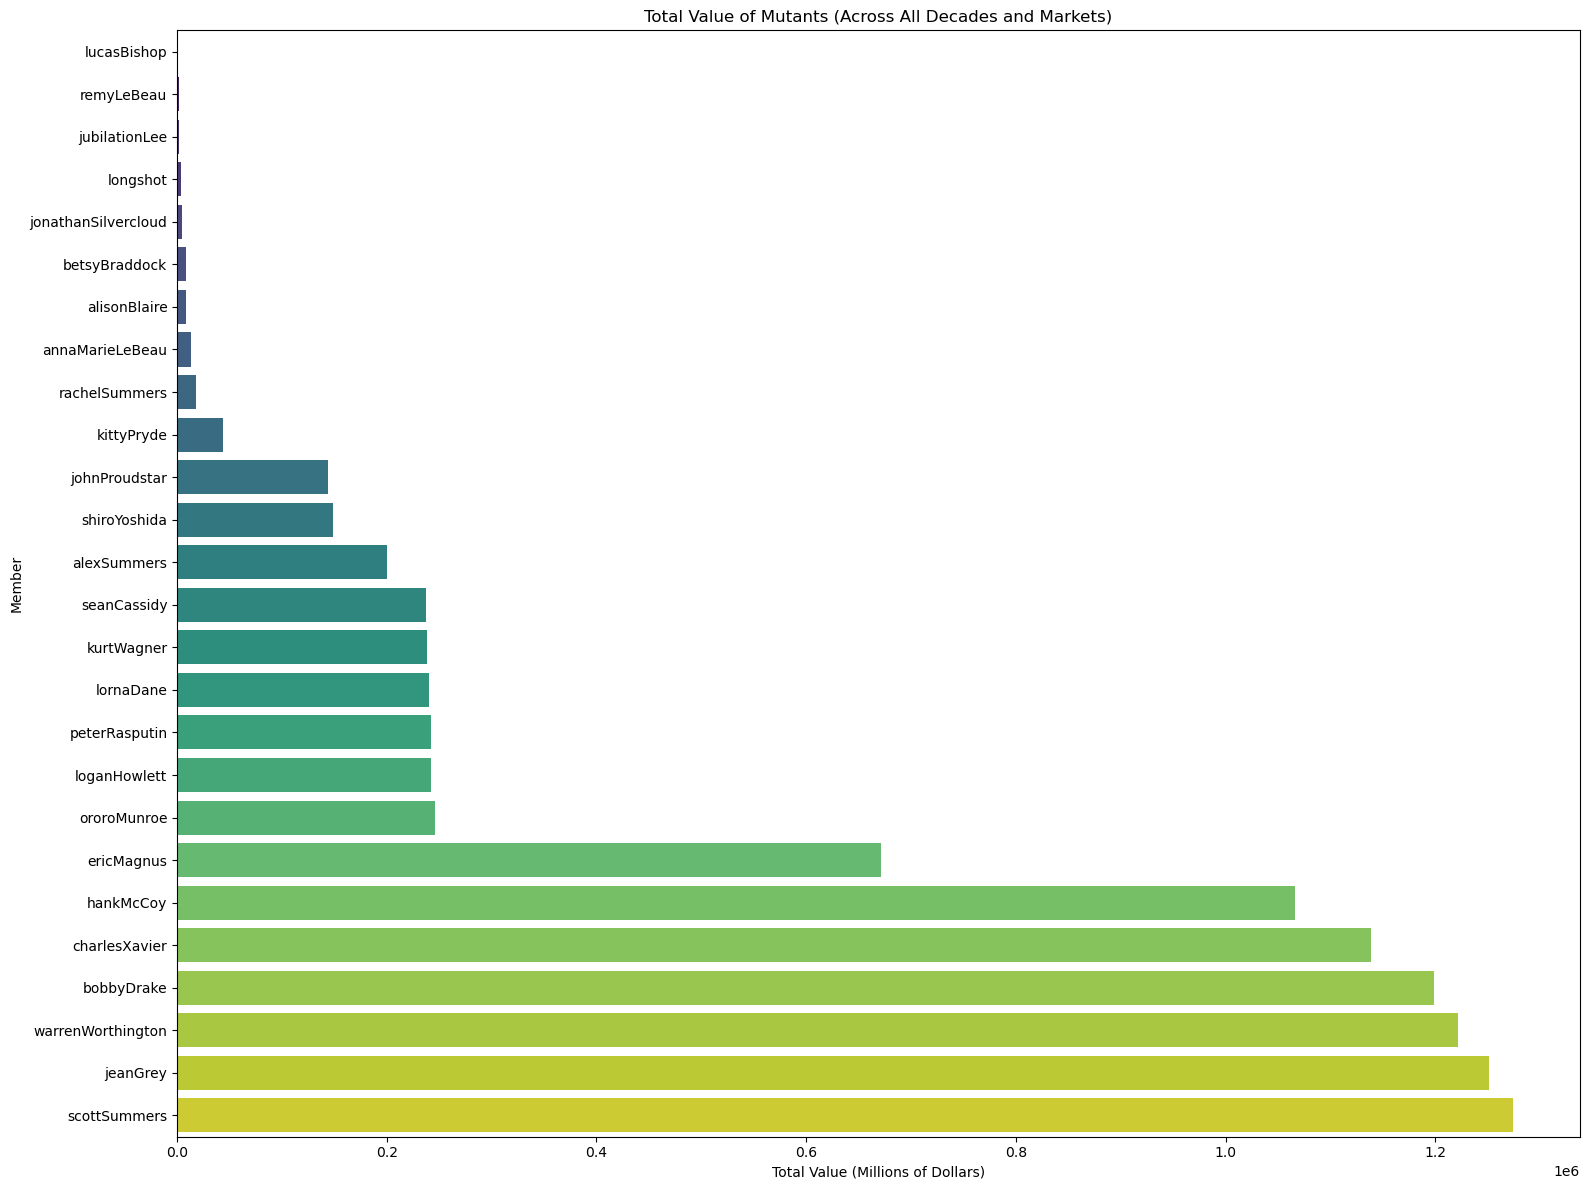

In [10]:
# Sort the df in ascending order
df_total_value = df_melted.groupby('Member', as_index=False)['TotalValue'].sum()
df_total_value_sorted = df_total_value.sort_values(by='TotalValue', ascending=True)


plt.figure(figsize=(16,12))
sns.barplot(x='TotalValue', y='Member', data=df_total_value_sorted, palette='viridis', errorbar=None)
plt.title('Total Value of Mutants (Across All Decades and Markets)')
plt.xlabel('Total Value (Millions of Dollars)')
plt.ylabel('Member')

plt.tight_layout()
plt.show()

**Figure 5: Stacked Barplot of Total Value across Markets for Each Mutant**

- This graphic is kind of like a combination of the first 2. 
- Again, the heritage markets make up for most of the value between the mutants.
- Wiz and Ebay make up for a very small portion of the total value for the mutants. 

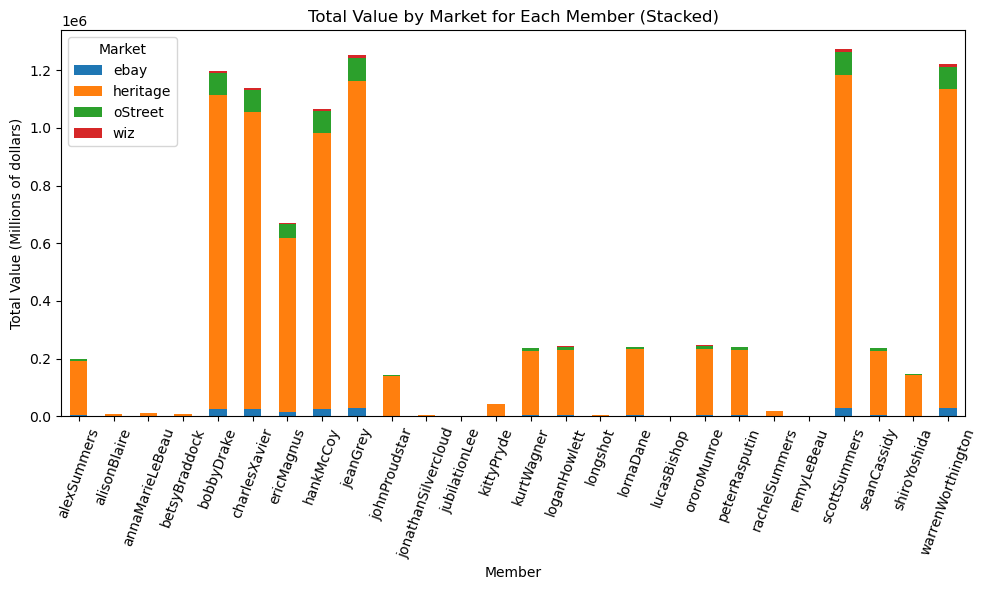

In [11]:
# Aggregate total values by Member and Market
df_member_market = df_melted.groupby(['Member', 'Market'], as_index=False)['TotalValue'].sum()

# Pivot the data: rows = Member, columns = Market, values = TotalValue
df_member_market_pivot = df_member_market.pivot(index='Member', columns='Market', values='TotalValue')

# Plot a stacked bar chart using the pivoted data
df_member_market_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Value by Market for Each Member (Stacked)')
plt.xlabel('Member')
plt.ylabel('Total Value (Millions of dollars)')
plt.legend(title='Market')
plt.xticks(rotation=70)

plt.tight_layout()
plt.show()

**Figures 6 and 7: HeatMap of Total Value of Mutants in the 90s**

- While I'm not crazy about the heatmap graphic, I figured I would try to show something different. For all intents and purposes - the bar plot looks much nicer. 
- This graphic shows that, although the total value in the 90s is much lower than in any other decade, some mutants become much more valuable in relative terms during this time period.
    - For example, Ororo Munroe, Jonathan Silvercloud, and Remy LeBeau become much more valuable and move up much higher in the rankings for the bar plot. 
    - Other mutants, like Jean Grey, remain popular

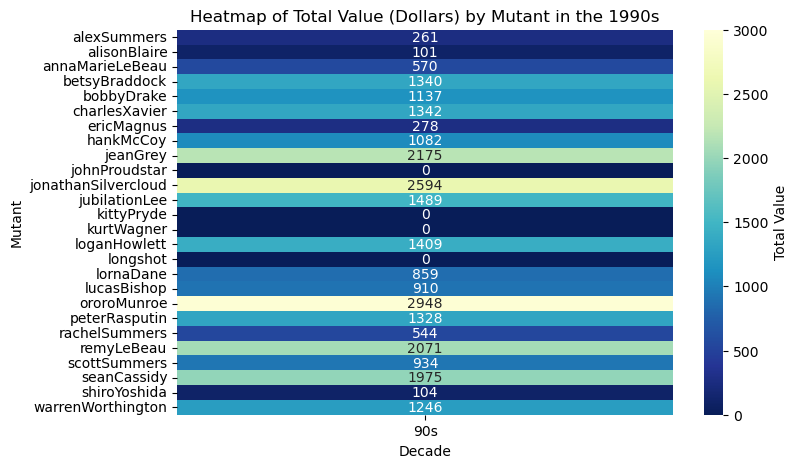

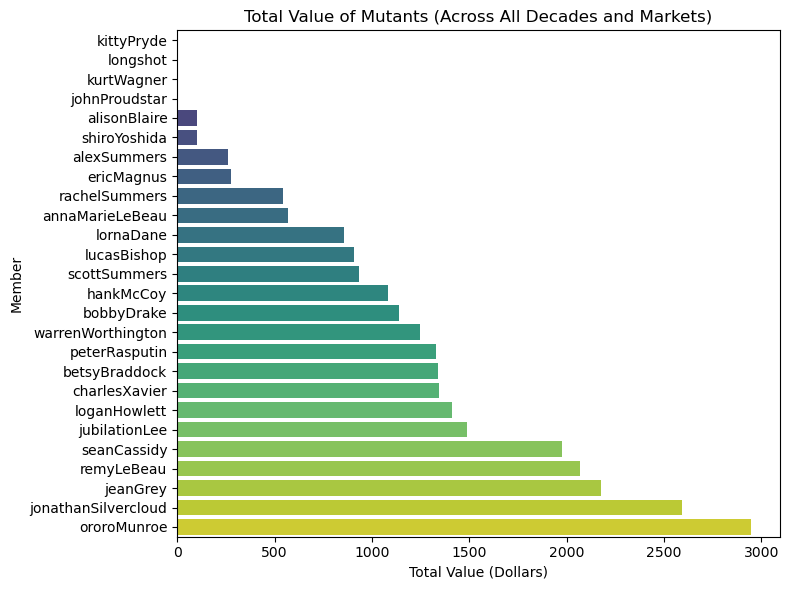

In [12]:
# Aggregate total values by Member and Decade
df_member_decade = df_melted.groupby(['Member', 'Decade'], as_index=False)['TotalValue'].sum()

# Filter for only 80s and 90s decades
df_member_decade_filtered = df_member_decade[df_member_decade['Decade'].isin(['90s'])]

# Pivot the filtered data: rows = Member, columns = Decade, values = TotalValue
df_member_decade_pivot = df_member_decade_filtered.pivot(index='Member', columns='Decade', values='TotalValue')

# Plot a heatmap with annotations for the values
plt.figure(figsize=(8, 5))
sns.heatmap(df_member_decade_pivot, annot=True, fmt='.0f', cmap='YlGnBu_r', 
            cbar_kws={'label': 'Total Value'}, 
            vmin=0, vmax=3000)

# Set the title and labels
plt.title('Heatmap of Total Value (Dollars) by Mutant in the 1990s')
plt.xlabel('Decade')
plt.ylabel('Mutant')


df_90s_sorted = df_member_decade_filtered.sort_values(by='TotalValue', ascending=True)
plt.figure(figsize=(8,6))
sns.barplot(x='TotalValue', y='Member', data=df_90s_sorted, palette='viridis', errorbar=None)
plt.title('Total Value of Mutants (Across All Decades and Markets)')
plt.xlabel('Total Value (Dollars)')
plt.ylabel('Member')

plt.tight_layout()
plt.show()

### Aggregation function and Pivot-Table

- The cell directly below this doesn't really give any useful information, but it shows how these aggregation functions could be applied. 
- The pivot table below is a much better use of the aggregation function, where I sum the total values within the pivot tables. 
    - The tables essentially show a dataframe version of the stacked barplot. 

In [13]:
# Select only the numeric columns
numeric_columns = df_melted.select_dtypes(include=['number'])

# Apply an aggregation functions to the numeric columns
df_agg = numeric_columns.agg([
    'min', 'max', 'mean', 'median', 'std', 'var', 'count', 'skew', 'kurt'
])

print(df_agg)


          TotalValue
min     0.000000e+00
max     9.336160e+05
mean    2.371729e+04
median  1.550000e+02
std     1.155881e+05
var     1.336062e+10
count   4.160000e+02
skew    6.977039e+00
kurt    5.032389e+01


In [14]:
# Pivot the data to restore to wide format
df_pivot = pd.pivot_table(df_melted, index='Member', columns='Decade',
                          values='TotalValue', aggfunc='sum')
print(df_pivot)


Decade                     60s       70s      80s      90s
Member                                                    
alexSummers            37456.0  152111.0  10688.0   261.00
alisonBlaire               0.0       0.0   8603.0   101.00
annaMarieLeBeau            0.0       0.0  12658.0   570.00
betsyBraddock              0.0       0.0   6847.0  1340.00
bobbyDrake           1029496.0  166412.0   1769.0  1137.00
charlesXavier         910856.0  181310.0  45502.0  1342.00
ericMagnus            648651.0    4720.0  17457.0   278.00
hankMcCoy            1029496.0   28040.0   7440.0  1082.50
jeanGrey             1033619.0  196746.0  18520.0  2175.00
johnProudstar              0.0  144090.0      0.0     0.00
jonathanSilvercloud        0.0       0.0   1862.0  2594.00
jubilationLee              0.0       0.0    691.0  1489.00
kittyPryde                 0.0       0.0  43703.0     0.00
kurtWagner                 0.0  183513.0  54791.0     0.00
loganHowlett               0.0  183513.0  57411.0  1409.

In [15]:
# Same thing but with markets instead of decades
df_pivot2 = pd.pivot_table(df_melted, index='Member', columns='Market',
                          values='TotalValue', aggfunc='sum')

print(df_pivot2)

Market                  ebay   heritage  oStreet       wiz
Member                                                    
alexSummers           4050.0   189014.0   6241.0   1211.00
alisonBlaire           558.0     7268.0    581.0    297.00
annaMarieLeBeau        624.0    11188.0    883.0    533.00
betsyBraddock          585.0     6603.0    577.0    422.00
bobbyDrake           26902.0  1086749.0  75995.0   9168.00
charlesXavier        26843.0  1029099.0  74038.0   9030.00
ericMagnus           16410.0   603328.0  46817.0   4551.00
hankMcCoy            24972.0   957993.0  74162.0   8931.50
jeanGrey             29158.0  1132091.0  79866.0   9945.00
johnProudstar         2375.0   138380.0   2925.0    410.00
jonathanSilvercloud    243.0     3710.0    301.0    202.00
jubilationLee          217.0     1592.0    212.0    159.00
kittyPryde             963.0    40655.0   1458.0    627.00
kurtWagner            5694.0   221716.0   8934.0   1960.00
loganHowlett          6118.0   224653.0   9319.0   2243.